In [ ]:
!pip install pywavelets holoviews bokeh

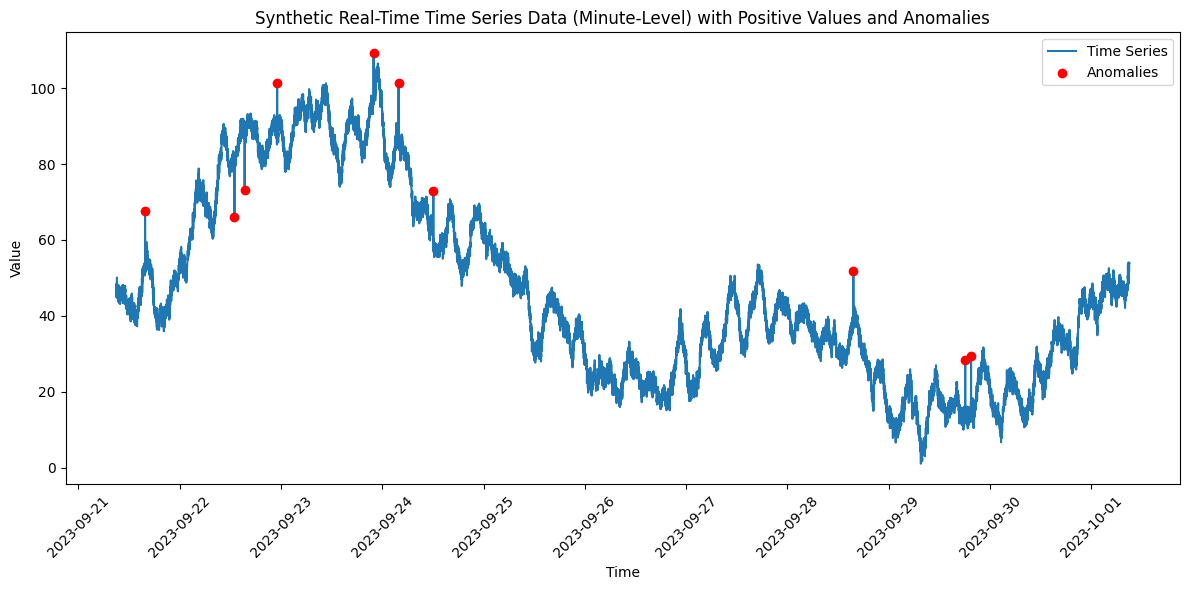

Anomalies inserted at the following indices (timestamps):

Index: 10476, Timestamp: 2023-09-28 15:36:00, Value: 51.890056283371536
Index: 1824, Timestamp: 2023-09-22 15:24:00, Value: 73.09173375169101
Index: 409, Timestamp: 2023-09-21 15:49:00, Value: 67.52153164746197
Index: 12149, Timestamp: 2023-09-29 19:29:00, Value: 29.416081681041206
Index: 4506, Timestamp: 2023-09-24 12:06:00, Value: 72.78619364026677
Index: 4012, Timestamp: 2023-09-24 03:52:00, Value: 101.24503557185783
Index: 3657, Timestamp: 2023-09-23 21:57:00, Value: 109.30266393022907
Index: 2286, Timestamp: 2023-09-22 23:06:00, Value: 101.25271472414873
Index: 12066, Timestamp: 2023-09-29 18:06:00, Value: 28.230239696909756
Index: 1679, Timestamp: 2023-09-22 12:59:00, Value: 66.04898121512818


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

# If you're running this in a Jupyter notebook, uncomment the following lines to install the required packages
# !pip install pywavelets
# !pip install holoviews bokeh

# Set the seed for reproducibility
seed_value = 42
np.random.seed(seed_value)
random.seed(seed_value)

def generate_minute_level_time_series_with_anomalies(
    start_time, periods, freq='1T', trend_amplitude=0.5,
    seasonality_amplitude=5, noise_amplitude=1, anomaly_factor=10,
    num_anomalies=5):
    """
    Generates a minute-level time series with anomalies.

    Parameters:
    - start_time (str): Start time of the time series.
    - periods (int): Number of periods (data points) to generate.
    - freq (str): Frequency string (e.g., '1T' for 1 minute).
    - trend_amplitude (float): Amplitude of the trend component.
    - seasonality_amplitude (float): Amplitude of the seasonal component.
    - noise_amplitude (float): Amplitude of the noise component.
    - anomaly_factor (float): Factor by which anomalies deviate from normal data.
    - num_anomalies (int): Number of anomalies to introduce.

    Returns:
    - time_series_df (DataFrame): DataFrame containing the time series.
    - anomaly_indices (list): Indices where anomalies are located.
    """

    # Create a time range starting from the provided start time
    time_range = pd.date_range(start=start_time, periods=periods, freq=freq)

    # Generate a random trend component (random walk)
    trend_component = np.cumsum(np.random.randn(periods) * trend_amplitude)

    # Generate a seasonal component (sinusoidal pattern)
    seasonal_period = 60 * 6  # 6-hour repeating seasonality
    seasonality_component = seasonality_amplitude * np.sin(
        np.linspace(0, 2 * np.pi * periods / seasonal_period, periods)
    )

    # Generate random noise component
    noise_component = noise_amplitude * np.random.randn(periods)

    # Combine trend, seasonality, and noise to form the base time series
    time_series_values = trend_component + seasonality_component + noise_component

    # Introduce anomalies at random points in the time series
    anomaly_indices = random.sample(range(periods), num_anomalies)

    for idx in anomaly_indices:
        # Randomly choose whether to make the anomaly a spike (positive) or a dip (negative)
        if random.choice([True, False]):
            time_series_values[idx] += anomaly_factor * noise_amplitude  # Positive anomaly (spike)
        else:
            time_series_values[idx] -= anomaly_factor * noise_amplitude  # Negative anomaly (dip)

    # Shift all values to be positive
    lowest_value = np.min(time_series_values)
    if lowest_value < 0:
        time_series_values += abs(lowest_value) + 1  # Shift all values to make them positive

    # Create a DataFrame with 'Timestamp' and 'Value'
    time_series_df = pd.DataFrame({'Timestamp': time_range, 'Value': time_series_values})

    return time_series_df, anomaly_indices

# Example usage: generate data for 10 days with minute-level frequency, including 10 anomalies
start_time = '2023-09-21 09:00'
periods = 1440 * 10  # Simulating 10 days of minute-level data (1440 minutes = 24 hours per day)
anomaly_factor = 15  # How extreme the anomalies should be
num_anomalies = 10  # Number of anomalies to introduce

# Generate the time series data
minute_level_data, anomaly_indices = generate_minute_level_time_series_with_anomalies(
    start_time, periods, anomaly_factor=anomaly_factor, num_anomalies=num_anomalies
)

# Plot the generated data, highlighting the anomalies
plt.figure(figsize=(12, 6))
plt.plot(minute_level_data['Timestamp'], minute_level_data['Value'], label='Time Series')

# Highlight the anomaly points in red
plt.scatter(
    minute_level_data.iloc[anomaly_indices]['Timestamp'],
    minute_level_data.iloc[anomaly_indices]['Value'],
    color='red', label='Anomalies', zorder=5
)

plt.title('Synthetic Real-Time Time Series Data (Minute-Level) with Positive Values and Anomalies')
plt.xlabel('Time')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Print the anomaly indices and their corresponding timestamps
print(f"Anomalies inserted at the following indices (timestamps):\n")
for idx in anomaly_indices:
    print(f"Index: {idx}, Timestamp: {minute_level_data['Timestamp'][idx]}, Value: {minute_level_data['Value'][idx]}")


In [ ]:
minute_level_data


,Timestamp,Value
0,2023-09-21 09:00:00,46.111188
1,2023-09-21 09:01:00,44.886666
2,2023-09-21 09:02:00,47.465482
3,2023-09-21 09:03:00,48.186878
4,2023-09-21 09:04:00,46.737831
...,...,...
14395,2023-10-01 08:55:00,51.702136
14396,2023-10-01 08:56:00,52.630279
14397,2023-10-01 08:57:00,52.249295
14398,2023-10-01 08:58:00,53.918461


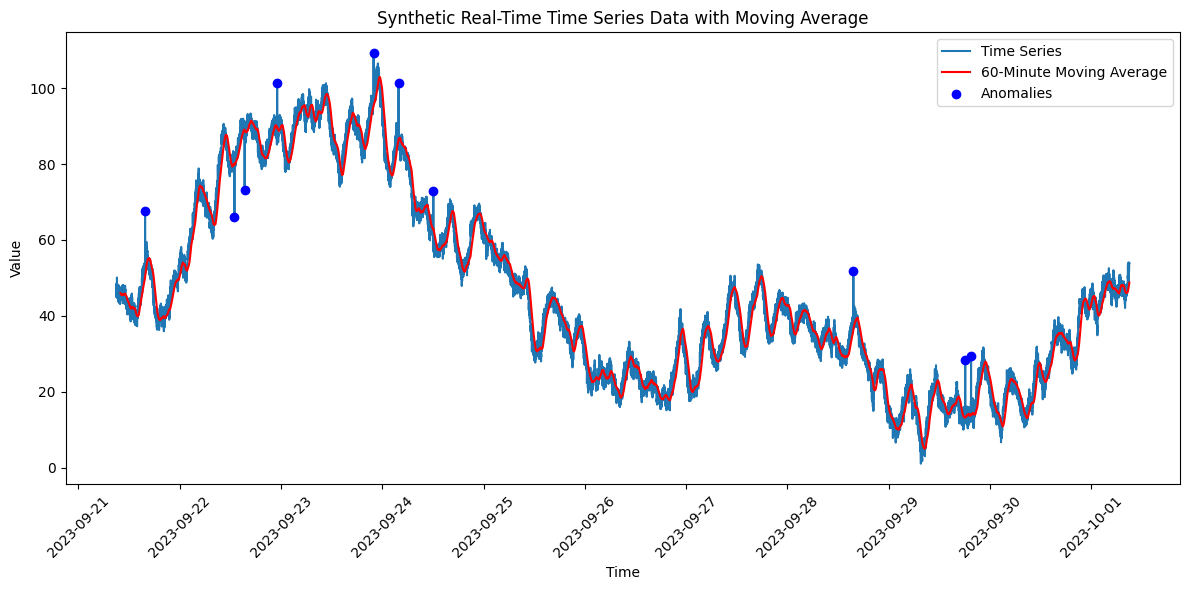

In [ ]:
import matplotlib.pyplot as plt
# Calculate the moving average
window_size = 60  # Example: 60-minute moving average
minute_level_data['MovingAverage'] = minute_level_data['Value'].rolling(window=window_size).mean()

# Plot the original time series and the moving average
plt.figure(figsize=(12, 6))
plt.plot(minute_level_data['Timestamp'], minute_level_data['Value'], label='Time Series')
plt.plot(minute_level_data['Timestamp'], minute_level_data['MovingAverage'], label=f'{window_size}-Minute Moving Average', color='red')

# Highlight the anomaly points in red
plt.scatter(minute_level_data.iloc[anomaly_indices]['Timestamp'], minute_level_data.iloc[anomaly_indices]['Value'],
            color='blue', label='Anomalies', zorder=5)

plt.title('Synthetic Real-Time Time Series Data with Moving Average')
plt.xlabel('Time')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


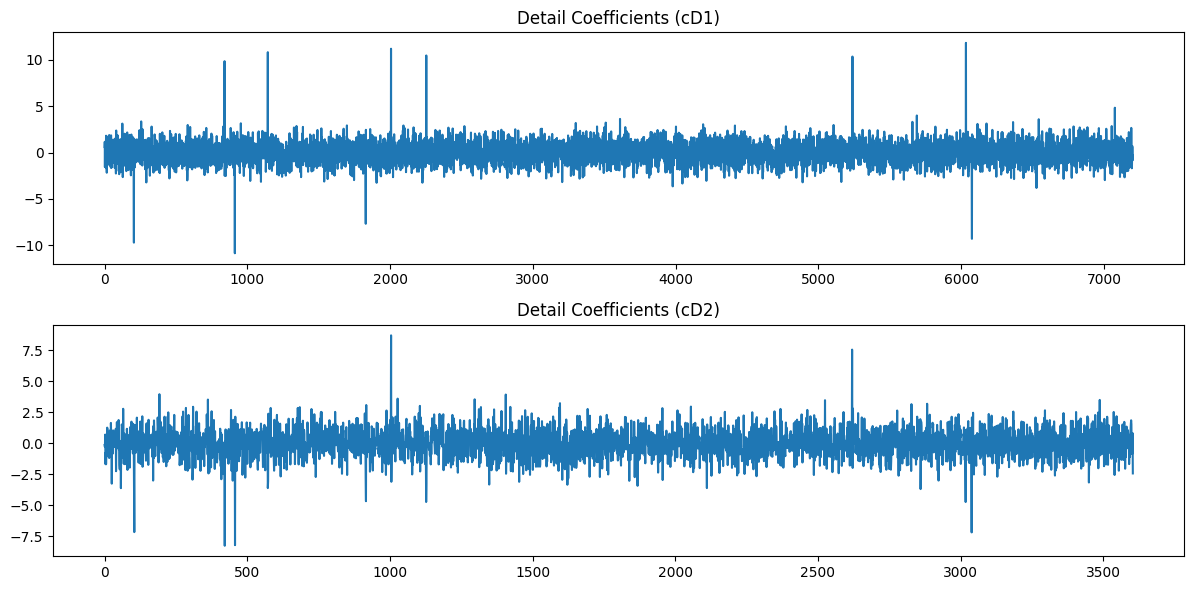

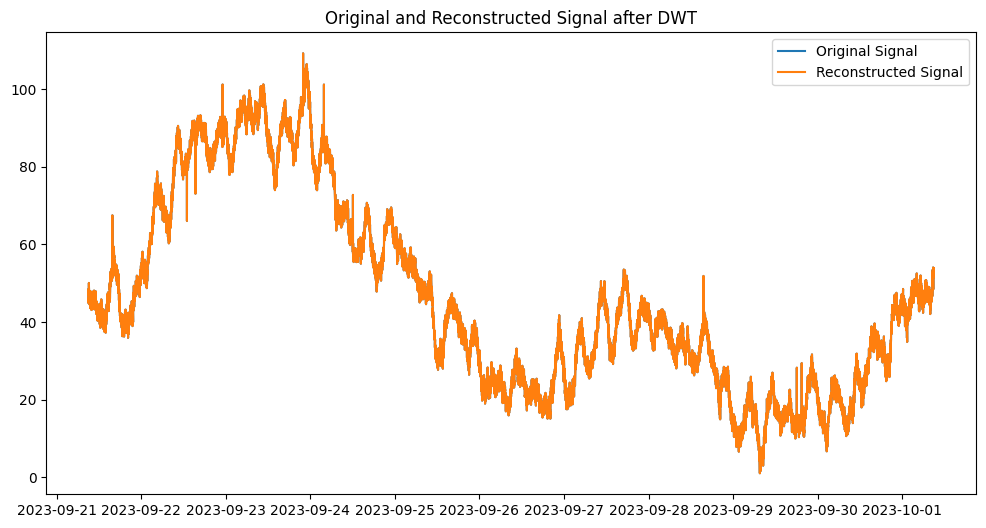

In [ ]:
import matplotlib.pyplot as plt
import pywt

# Extract the values from the DataFrame
values = minute_level_data['Value'].values

# Choose a wavelet function (e.g., 'db4' for Daubechies wavelet)
wavelet = 'db4'

# Perform the DWT
coeffs = pywt.wavedec(values, wavelet, level=5)  # You can adjust the level as needed

# Access the approximation (cA) and detail (cD) coefficients
cA5, cD5, cD4, cD3, cD2, cD1 = coeffs

# You can analyze and plot the coefficients to identify anomalies
# For example, plot the detail coefficients:

plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(cD1)
plt.title('Detail Coefficients (cD1)')

plt.subplot(2, 1, 2)
plt.plot(cD2)
plt.title('Detail Coefficients (cD2)')

plt.tight_layout()
plt.show()

# You can also reconstruct the signal from the coefficients:
reconstructed_signal = pywt.waverec(coeffs, wavelet)

# Plot the reconstructed signal against the original signal
plt.figure(figsize=(12, 6))
plt.plot(minute_level_data['Timestamp'], values, label='Original Signal')
plt.plot(minute_level_data['Timestamp'], reconstructed_signal, label='Reconstructed Signal')
plt.legend()
plt.title('Original and Reconstructed Signal after DWT')
plt.show()


Descriptive Statistics:
count    14400.000000
mean        46.135925
std         24.891575
min          1.000000
25%         25.819068
50%         40.774218
75%         63.034591
max        109.302664
Name: Value, dtype: float64


<Figure size 1200x600 with 0 Axes>

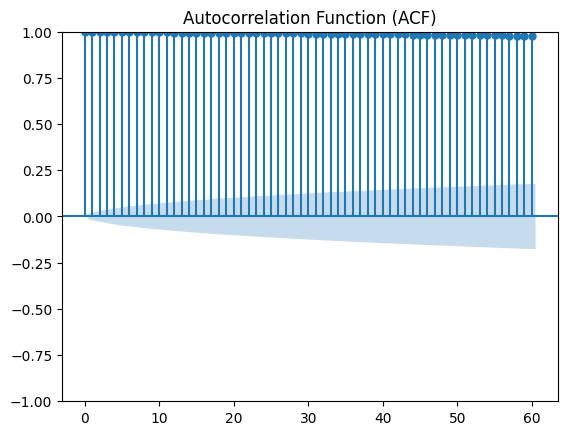

<Figure size 1200x600 with 0 Axes>

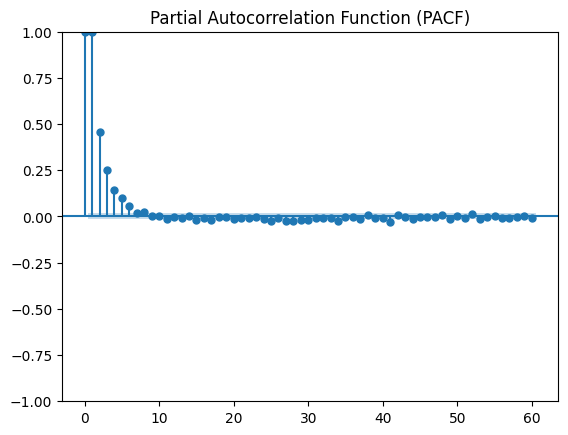


Dickey-Fuller Test:
ADF Statistic: -1.8178770068364432
p-value: 0.3716230677709734
Critical Values: {'1%': -3.4308054961632544, '5%': -2.8617413089394477, '10%': -2.5668771520040696}
The time series is likely non-stationary.


In [ ]:
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from scipy import stats

# ... (Your existing code for generating the time series data) ...

# 1. Descriptive Statistics
print("Descriptive Statistics:")
print(minute_level_data['Value'].describe())

# 2. Time Series Plot (Already done in previous code)

# 3. Autocorrelation and Partial Autocorrelation Function (ACF and PACF)
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(12, 6))
plot_acf(minute_level_data['Value'], lags=60)
plt.title('Autocorrelation Function (ACF)')
plt.show()

plt.figure(figsize=(12, 6))
plot_pacf(minute_level_data['Value'], lags=60)
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()

# 4. Dickey-Fuller Test for Stationarity
result = adfuller(minute_level_data['Value'])
print('\nDickey-Fuller Test:')
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

if result[1] <= 0.05:
    print("The time series is likely stationary.")
else:
    print("The time series is likely non-stationary.")

In [ ]:
# 5. Hypothesis Testing (Example: T-test to compare means before and after a suspected change point)
# You can define a change point in your time series data (e.g., a timestamp)
change_point = '2023-09-21 12:00'
before_change = minute_level_data['Value'][minute_level_data['Timestamp'] < change_point]
after_change = minute_level_data['Value'][minute_level_data['Timestamp'] >= change_point]

t_statistic, p_value = stats.ttest_ind(before_change, after_change)
print('\nT-test results:')
print('T-statistic:', t_statistic)
print('p-value:', p_value)

if p_value <= 0.05:
    print("There is evidence of a significant difference in the means before and after the change point.")
else:
    print("There is no evidence of a significant difference in the means before and after the change point.")

# 6. Seasonality Analysis
# You can analyze the seasonal component if present using methods like:
# - Fourier transform to identify dominant frequencies
# - Decomposition (e.g., STL decomposition)

# 7. Trend Analysis
# You can explore the trend in your data using techniques like:
# - Linear regression to fit a trend line
# - Moving averages to visualize and quantify the trend


T-test results:
T-statistic: -0.6343149355235643
p-value: 0.5258853890724628
There is no evidence of a significant difference in the means before and after the change point.


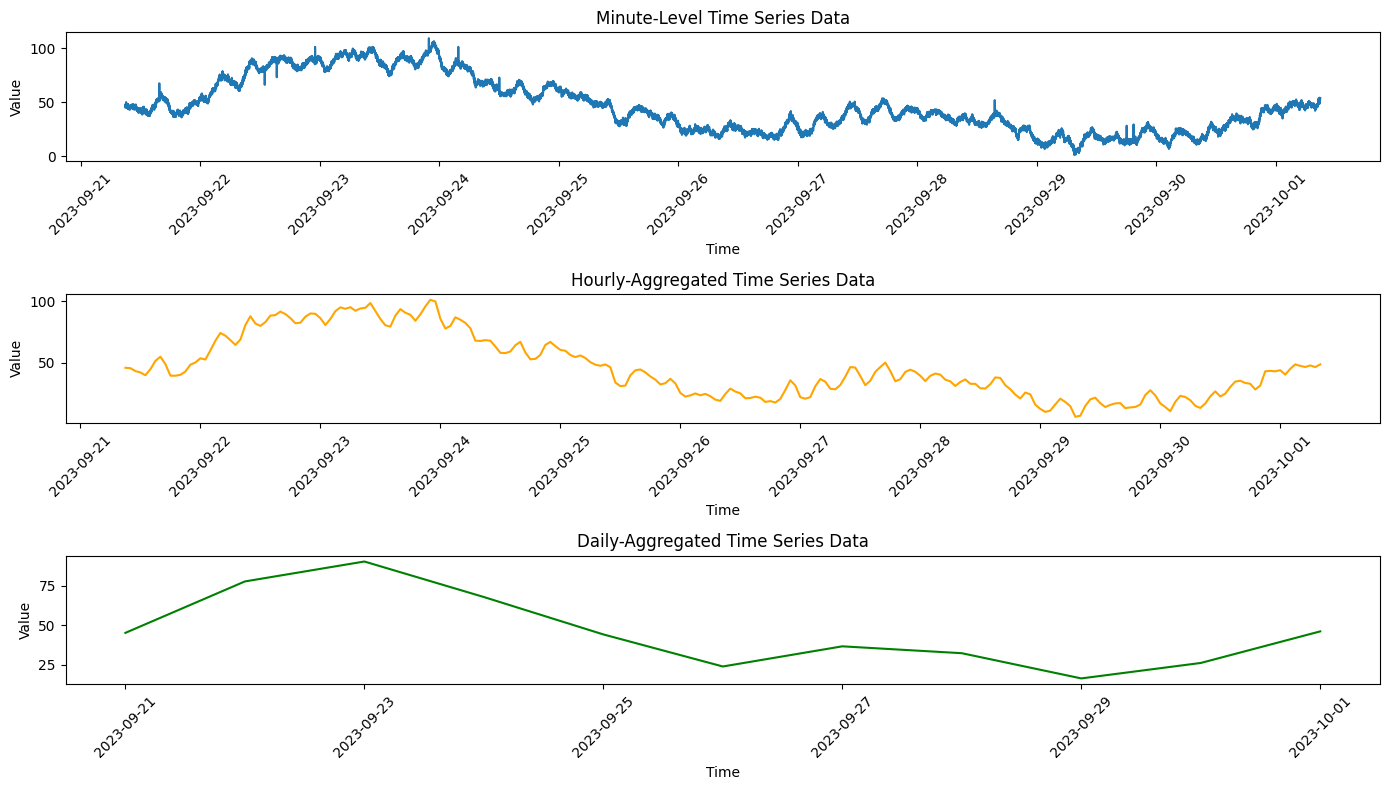

In [ ]:
# Assuming minute_level_data is already generated as in the previous code

# Resample the data to hourly intervals (mean aggregation)
hourly_data = minute_level_data.resample('H', on='Timestamp').mean()

# Resample the data to daily intervals (mean aggregation)
daily_data = minute_level_data.resample('D', on='Timestamp').mean()

# Plotting the original minute-level data, hourly-aggregated data, and daily-aggregated data
plt.figure(figsize=(14, 8))

# Subplot for minute-level data
plt.subplot(3, 1, 1)
plt.plot(minute_level_data['Timestamp'], minute_level_data['Value'], label='Minute-level Data')
plt.title('Minute-Level Time Series Data')
plt.xlabel('Time')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.tight_layout()

# Subplot for hourly data
plt.subplot(3, 1, 2)
plt.plot(hourly_data.index, hourly_data['Value'], label='Hourly Data', color='orange')
plt.title('Hourly-Aggregated Time Series Data')
plt.xlabel('Time')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.tight_layout()

# Subplot for daily data
plt.subplot(3, 1, 3)
plt.plot(daily_data.index, daily_data['Value'], label='Daily Data', color='green')
plt.title('Daily-Aggregated Time Series Data')
plt.xlabel('Time')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.tight_layout()

# Show all the plots
plt.show()


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
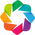

:Layout
   .Distribution.Minute_hyphen_minus_Level_Value_Distribution :Distribution   [Value]   (Density)
   .Distribution.Hour_hyphen_minus_Level_Value_Distribution   :Distribution   [Value]   (Density)
   .Distribution.Daily_hyphen_minus_Level_Value_Distribution  :Distribution   [Value]   (Density)

In [ ]:
import holoviews as hv
from holoviews import opts

hv.extension('bokeh')

# Assuming 'minute_level_data' is your DataFrame with 'Timestamp' and 'Value' columns

# Minute-Level Distribution Plot (Original Data)
minute_distribution = hv.Distribution(
    minute_level_data['Value'],
    label='Minute-Level Value Distribution'
).opts(
    xlabel='Value',
    ylabel='Density',
    width=800,
    height=300,
    title='Minute-Level Value Distribution Density Plot',
    tools=['hover'],
    color='blue'
)

# Aggregate data to Hour-Level
hour_level_data = minute_level_data.resample('H', on='Timestamp').mean()

# Hour-Level Distribution Plot
hour_distribution = hv.Distribution(
    hour_level_data['Value'],
    label='Hour-Level Value Distribution'
).opts(
    xlabel='Value',
    ylabel='Density',
    width=800,
    height=300,
    title='Hour-Level Value Distribution Density Plot',
    tools=['hover'],
    color='green'
)

# Aggregate data to Daily-Level
daily_level_data = minute_level_data.resample('D', on='Timestamp').mean()

# Daily-Level Distribution Plot
daily_distribution = hv.Distribution(
    daily_level_data['Value'],
    label='Daily-Level Value Distribution'
).opts(
    xlabel='Value',
    ylabel='Density',
    width=800,
    height=300,
    title='Daily-Level Value Distribution Density Plot',
    tools=['hover'],
    color='red'
)

# Display the plots individually
# To display in a Jupyter Notebook or similar environment, simply call the variable
# For example:
# minute_distribution
# hour_distribution
# daily_distribution

# Alternatively, display all three plots in a single layout
distribution_layout = (minute_distribution + hour_distribution + daily_distribution).cols(1)
distribution_layout.opts(shared_axes=False)

# Display the layout
distribution_layout
